In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import chart_studio.plotly as py
import datetime
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()
plt.style.use('ggplot')

## Import dataset csv

In [3]:
netflix = pd.read_csv('netflix_titles.csv')

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix.shape

(7787, 12)

In [6]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## Null Handling
* For the director, cast, country fields, I'll replace nulls with the 'unknown' keyword.
* Null entries in date_added and rating fields will be dropped.

In [7]:
netflix.director.fillna('unknown', inplace=True)
netflix.cast.fillna('unknown', inplace=True)
netflix.country.fillna('unknown', inplace=True)

In [8]:
netflix.dropna(subset=['date_added'], inplace=True)
netflix.dropna(subset=['rating'], inplace=True)

In [9]:
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
listed_in = []
for i in range(len(netflix)):
    listed_in.extend(netflix.listed_in.iloc[i].split(','))

In [11]:
category_amount = {}
for i in listed_in:
    category_amount[i] = listed_in.count(i)

In [12]:
def get_amount(category):
    return category[1]

category_amount = dict(sorted(category_amount.items(), key=get_amount, reverse=True))

## Number of each content type on Netflix

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Content Type')]

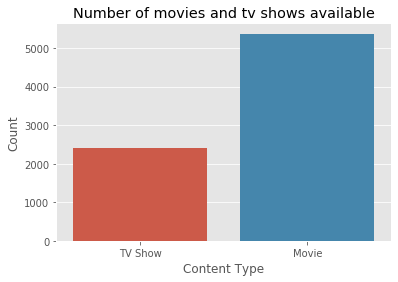

In [13]:
count_type = sns.countplot(x='type', data=netflix)
count_type.set_title('Number of movies and tv shows available')
count_type.set(xlabel='Content Type', ylabel='Count')

## Amount of content uploaded each month

In [14]:
netflix['month_added'] = np.nan

In [15]:
for i in range(len(netflix)):
    netflix['month_added'][i] = netflix.date_added.iloc[i].split(' ')[0]

In [16]:
netflix['month_added'].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Month')]

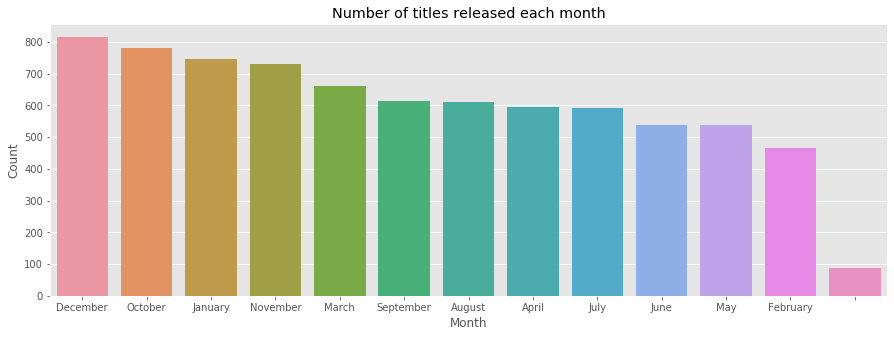

In [17]:
plt.figure(figsize=(15,5))
month_count = sns.countplot(x='month_added', data=netflix, order=netflix['month_added'].value_counts().index)
month_count.set_title('Number of titles released each month')
month_count.set(xlabel='Month', ylabel='Count')

## Top 8 categories with most titles

[' International Movies', 'Dramas', 'Comedies', 'Documentaries', ' Dramas', 'Action & Adventure', 'International TV Shows', ' Independent Movies']
[2323, 1383, 1074, 751, 722, 721, 689, 653]
[0 1 2 3 4 5 6 7]


Text(0, 0.5, 'Categories')

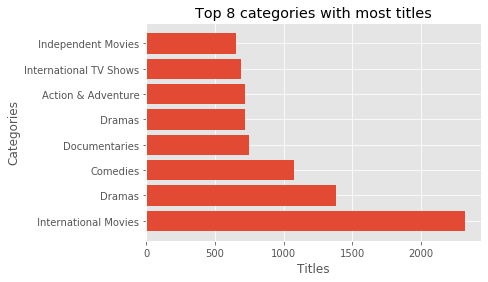

In [18]:
top8 = list(category_amount.values())[:8]
categories = list(category_amount.keys())[:8]
width = np.arange(len(categories))

print(categories)
print(top8)
print(width)

plt.barh(width, top8)

plt.title('Top 8 categories with most titles') 
plt.xlabel('Titles')
plt.yticks(width, categories)
plt.ylabel('Categories') 

TypeError: unsupported operand type(s) for /: 'str' and 'int'

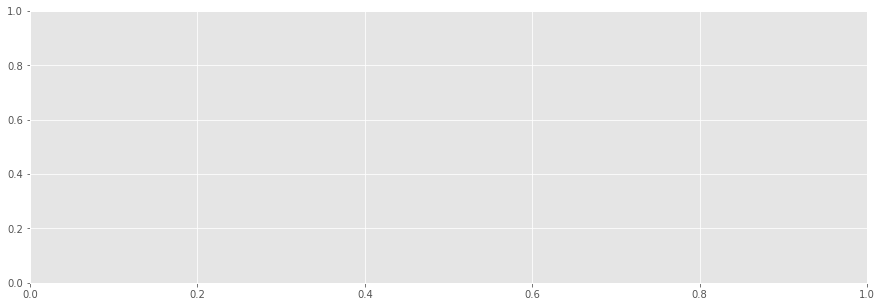

In [31]:
plt.figure(figsize=(15,5))
sns.distplot(netflix['duration'])